# Prédiction des différentes sources d'énergie

Dans ce notebook, nous allons nous intéresser aux différentes sources d'énergie afin de prédire leur utilisation au 8 décembre 2022.

In [60]:
# Import des librairies
import pandas as pd
import pooch 
import os
import matplotlib.pyplot as plt
import pylab

# Paramètres d'affichage
pylab.style.use('fivethirtyeight') 
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (14, 6),
          'lines.linewidth': 1.5,
          'axes.labelsize': 'x-large',
          'axes.titlesize':25,
          'axes.titleweight':'bold',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

Nous avons récolté nos données sur le site OPENDATA RESAUX-ENERGIES (https://opendata.reseaux-energies.fr/) qui retrace les différentes consommations depuis un certain nombre d'années. 


In [77]:
# Préparation de notre jeu de données
cons = pd.read_csv('eco2mix-national-cons-def.csv', delimiter=';')
cons = cons.set_index('Date')
#print(cons.head(10))

data = cons.loc[["2021-12-08", "2020-12-08", "2019-12-08", "2018-12-08", "2017-12-08"
                 , "2016-12-08", "2015-12-08", "2014-12-08", "2013-12-08"
                 , "2012-12-08"]]
#print(data)


C:\Users\Pauline\AppData\Local\Temp\ipykernel_580\1064077699.py:2: DtypeWarning: Columns (23,28) have mixed types. Specify dtype option on import or set low_memory=False.
  cons = pd.read_csv('eco2mix-national-cons-def.csv', delimiter=';')


Afin de prédire au mieux chaque source d'énergie, nous avons choisi de récolter seulement les données datant du 8 décembre de chaque année disponible. 
En effet, nous savons que la moyenne empirique tend vers l'espérance. 
Nous avons donc fait le choix d'estimer chaque consommation du 8 décembre par son espérance, elle-même estimée par la moyenne empirique.

Nous sommes conscient que ce n'est pas la meilleure prédiction possible, il faudrait également prendre en compte les températures annoncées, l'augmentation du prix du gaz et de l'électricité en général etc...

## Etude du Gaz

C:\Users\Pauline\AppData\Local\Temp\ipykernel_580\2713204143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.dropna(inplace = True)                           # on supprime l'ensemble des valeurs manquantes s'il y en a


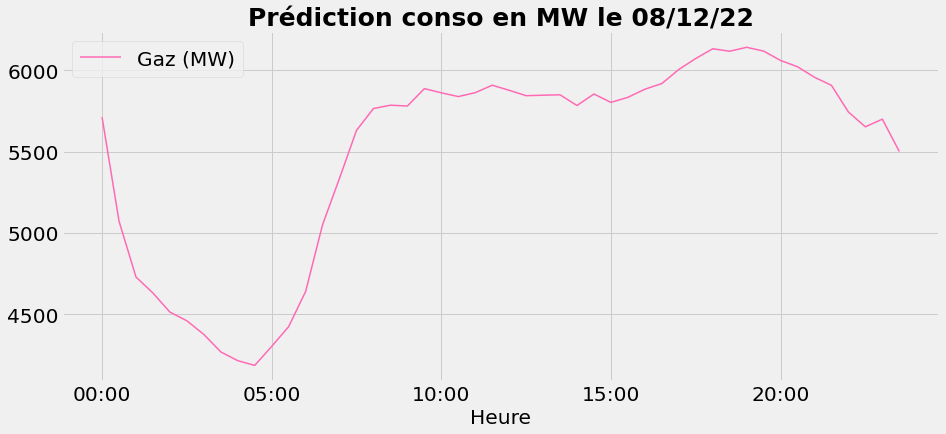

In [64]:
data1 = data.copy()
data1 = data[['Heure', 'Gaz (MW)']]                    # on récupère que les données qui nous intéressent de notre dataframe de départ
data1.dropna(inplace = True)                           # on supprime l'ensemble des valeurs manquantes s'il y en a  
data1 = data1.sort_values(by='Heure', ascending=True)  # on ré-arrange nos données en les triant par heures égales
data1.set_index('Heure', inplace=True)                 # on indexe sur les heures afin que les données soient plus facilement manipulables 
#print(data1)
moy1 = data1.groupby(["Heure"])['Gaz (MW)'].mean()     # on calcule la moyenne de la consommation en gaz en fonction des heures 

## Affichage graphique 
plt.figure()
Gaz = moy1.plot(color='hotpink')
plt.title('Prédiction conso en MW le 08/12/22')
plt.legend()

In [66]:
df_gaz = moy1.to_frame()  # on convertit en dataframe juste pour que l'affichage sous forme de tableau soit plus 'joli'
df_gaz

,Gaz (MW)
Heure,
00:00,5712.7
00:30,5072.6
01:00,4729.3
01:30,4630.7
02:00,4513.5
02:30,4460.0
03:00,4376.0
03:30,4268.4
04:00,4214.7


## Etude du Fioul

C:\Users\Pauline\AppData\Local\Temp\ipykernel_580\1952496119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.dropna(inplace = True)


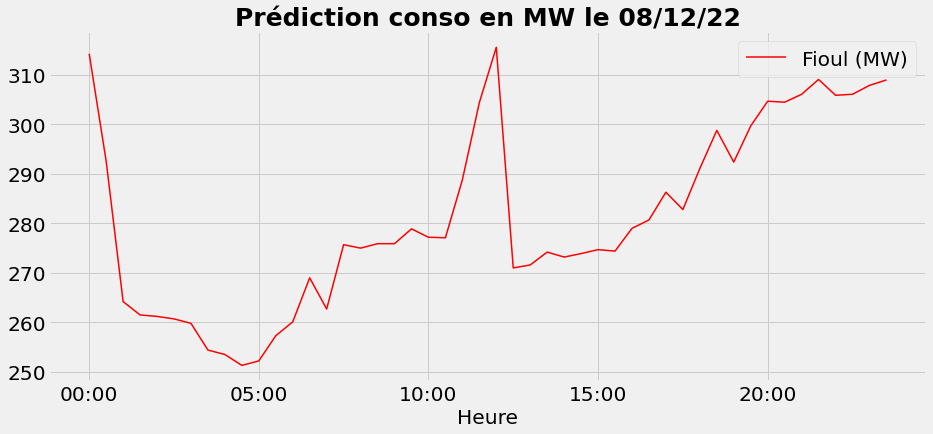

In [68]:
data2 = data[['Heure', 'Fioul (MW)']]
data2.dropna(inplace = True)
data2 = data2.sort_values(by='Heure', ascending=True)
data2.set_index('Heure', inplace=True)
#print(data2)
moy2 = data2.groupby(["Heure"])['Fioul (MW)'].mean()

plt.figure()
Fioul = moy2.plot(color='red')
plt.title('Prédiction conso en MW le 08/12/22')
plt.legend()

In [70]:
df_fioul = moy2.to_frame()
df_fioul

,Fioul (MW)
Heure,
00:00,314.3
00:30,292.6
01:00,264.2
01:30,261.5
02:00,261.2
02:30,260.7
03:00,259.8
03:30,254.4
04:00,253.5


## Etude du Charbon 

C:\Users\Pauline\AppData\Local\Temp\ipykernel_580\906334309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.dropna(inplace = True)


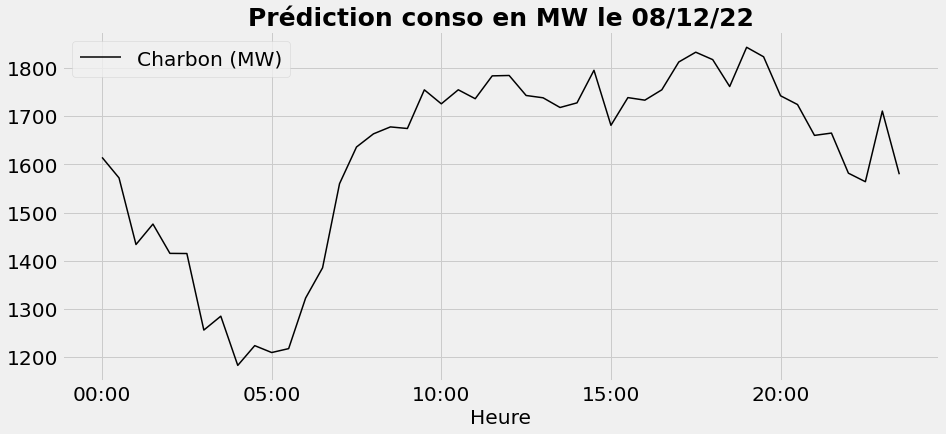

In [74]:
data3 = data[['Heure', 'Charbon (MW)']]
data3.dropna(inplace = True)
data3 = data3.sort_values(by='Heure', ascending=True)
data3.set_index('Heure', inplace=True)
#print(data3)
moy3 = data3.groupby(["Heure"])['Charbon (MW)'].mean()

plt.figure()
Charbon = moy3.plot(color='black')
plt.title('Prédiction conso en MW le 08/12/22')
plt.legend() 

In [75]:
df_charbon = moy3.to_frame()
df_charbon

,Charbon (MW)
Heure,
00:00,1614.5
00:30,1571.9
01:00,1433.7
01:30,1476.1
02:00,1415.3
02:30,1415.0
03:00,1256.2
03:30,1285.0
04:00,1182.9


## Etude du Nucléaire 

C:\Users\Pauline\AppData\Local\Temp\ipykernel_580\1735584260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4.dropna(inplace = True)


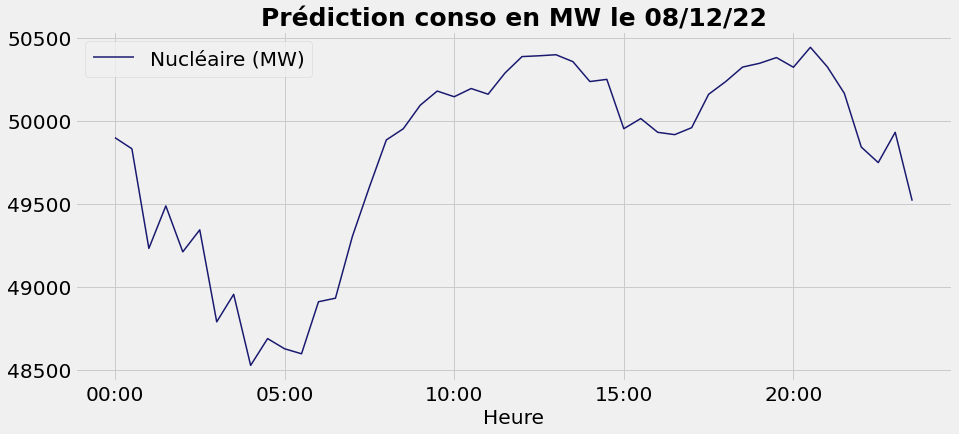

In [76]:
data4 = data[['Heure', 'Nucléaire (MW)']]
data4.dropna(inplace = True)
data4 = data4.sort_values(by='Heure', ascending=True)
data4.set_index('Heure', inplace=True)
#print(data4)
moy4 = data4.groupby(["Heure"])['Nucléaire (MW)'].mean()

plt.figure()
Nucléaire = moy4.plot(color='midnightblue')
plt.title('Prédiction conso en MW le 08/12/22')
plt.legend()

In [47]:
df_nucleaire = moy4.to_frame()
df_nucleaire

,Nucléaire (MW)
Heure,
00:00,49899.6
00:30,49832.5
01:00,49232.9
01:30,49488.7
02:00,49212.2
02:30,49344.6
03:00,48790.8
03:30,48956.5
04:00,48528.7


## Etude de l'Eolien, de l'Hydraulique et du Solaire


C:\Users\Pauline\AppData\Local\Temp\ipykernel_580\131970146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5.dropna(inplace = True)


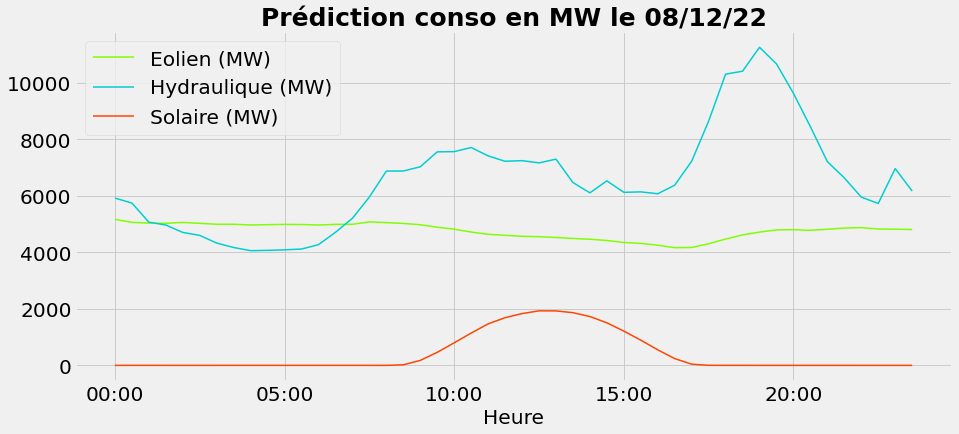

In [40]:
data5 = data[['Heure', 'Eolien (MW)', 'Hydraulique (MW)', 'Solaire (MW)']]
data5.dropna(inplace = True)
data5 = data5.sort_values(by='Heure', ascending=True)
data5.set_index('Heure', inplace=True)
#print(data5)
moy51 = data5.groupby(["Heure"])['Eolien (MW)'].mean()
moy52 = data5.groupby(["Heure"])['Hydraulique (MW)'].mean()
moy53 = data5.groupby(["Heure"])['Solaire (MW)'].mean()

plt.figure()
Eolien = moy51.plot(color='chartreuse')
Hydraulique = moy52.plot(color='darkturquoise')
Solaire = moy53.plot(color='orangered')
plt.title('Prédiction conso en MW le 08/12/22')
plt.legend()

In [44]:
df_eolien = moy51.to_frame()
df_eolien

,Eolien (MW)
Heure,
00:00,5171.7
00:30,5065.1
01:00,5038.5
01:30,5030.8
02:00,5063.3
02:30,5030.0
03:00,4998.0
03:30,4997.8
04:00,4971.6


In [42]:
df_hydraulique = moy52.to_frame()
df_hydraulique

,Hydraulique (MW)
Heure,
00:00,5925.0
00:30,5748.6
01:00,5071.6
01:30,4970.3
02:00,4707.6
02:30,4603.2
03:00,4331.3
03:30,4174.3
04:00,4062.0


In [43]:
df_solaire = moy53.to_frame()
df_solaire

,Solaire (MW)
Heure,
00:00,0.4
00:30,0.6
01:00,0.6
01:30,0.5
02:00,0.3
02:30,0.5
03:00,0.5
03:30,0.6
04:00,0.6
